In [82]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [48]:
# dataframe
df = pd.read_csv("Bakery.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [26]:
#number of entries
len(df)

20507

In [30]:
#unique items
print("Total number of unique items is {}".format(len(df['Items'].unique())))

Total number of unique items is 94


# Preprocessing the data

In [53]:
# dataframe for preprocessing
df2 = pd.read_csv("Bakery.csv")
df2.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [58]:
#least frequent items
val_counts = df2["Items"].value_counts()
val_counts.tail(10)

Chimichurri Oil    2
Siblings           2
Chicken sand       1
The BART           1
Adjustment         1
Bacon              1
Gift voucher       1
Olum & polenta     1
Raw bars           1
Polenta            1
Name: Items, dtype: int64

In [59]:
#excluding least frequent items
excluded = list(val_counts[val_counts.values < 2].index)

In [60]:
#transfroming data to apply the algorithm
transactions=[]
for action in df2["TransactionNo"].unique():
    transaction=list(set(df2[df2["TransactionNo"]==action]['Items']))
    if not any(x in transaction for x in excluded):
        if len(transaction) !=1:
            transactions.append(transaction)
            
#entries having only one transactions merged


In [61]:
len(transactions)

5510

In [62]:
transactions[0:20]

[['Hot chocolate', 'Jam', 'Cookies'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Pastry', 'Coffee', 'Tea', 'Medialuna'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna'],
 ['Tea', 'Tartine', 'Jam', 'Pastry', 'Coffee'],
 ['Bread', 'Coffee', 'Basket'],
 ['Pastry', 'Bread', 'Medialuna'],
 ['Scandinavian', 'Mineral water'],
 ['Coffee', 'Bread', 'Medialuna'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Bread', 'Medialuna'],
 ['Scandinavian', 'Muffin'],
 ['Coffee', 'Bread'],
 ['Jam', 'Bread'],
 ['Scandinavian', 'Muffin']]

In [101]:
#Converting the transactions dataset 
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df3 = pd.DataFrame(te_ary, columns=te.columns_)
df3


,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,...,Tea,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5506,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5507,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
5508,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [102]:
encoded =pd.get_dummies(df3.apply(pd.Series).stack()).groupby(level=0).sum()

# Applying apriori

In [110]:
#Generating a frequent itemset 
frequent_itemsets = apriori(df3,min_support=0.01,use_colnames=True)
print("The top 10 frequent items are")
frequent_itemsets.sort_values("support",ascending=False)[:10]


The top 10 frequent items are


,support,itemsets
6,0.604900,(Coffee)
2,0.345191,(Bread)
29,0.207623,(Tea)
4,0.160436,(Cake)
38,0.154628,"(Coffee, Bread)"
21,0.136116,(Pastry)
23,0.111252,(Sandwich)
18,0.095826,(Medialuna)
53,0.094011,"(Cake, Coffee)"
13,0.087659,(Hot chocolate)


In [111]:
#Generating association rules 
res = association_rules(frequent_itemsets,metric='lift',min_threshold=1.2)
res.sort_values("confidence",ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Toast),(Coffee),0.055172,0.604900,0.040653,0.736842,1.218122,0.007280,1.501379
16,(Soup),(Tea),0.051906,0.207623,0.015608,0.300699,1.448298,0.004831,1.133100
15,(Scone),(Tea),0.054991,0.207623,0.014338,0.260726,1.255770,0.002920,1.071832
4,(Cake),(Tea),0.160436,0.207623,0.040835,0.254525,1.225902,0.007525,1.062916
19,"(Hot chocolate, Coffee)",(Cake),0.050817,0.160436,0.011797,0.232143,1.446954,0.003644,1.093386
1,(Hot chocolate),(Cake),0.087659,0.160436,0.019601,0.223602,1.393721,0.005537,1.081359
22,"(Tea, Coffee)",(Cake),0.085481,0.160436,0.017241,0.201699,1.257193,0.003527,1.051688
5,(Tea),(Cake),0.207623,0.160436,0.040835,0.196678,1.225902,0.007525,1.045116
3,(Juice),(Cake),0.062432,0.160436,0.012160,0.194767,1.213992,0.002143,1.042636
11,(Juice),(Cookies),0.062432,0.085299,0.010526,0.168605,1.976620,0.005201,1.100199


# Visualizations

In [44]:
val_counts = dict(df["Items"].value_counts()[:10])

<Axes: >

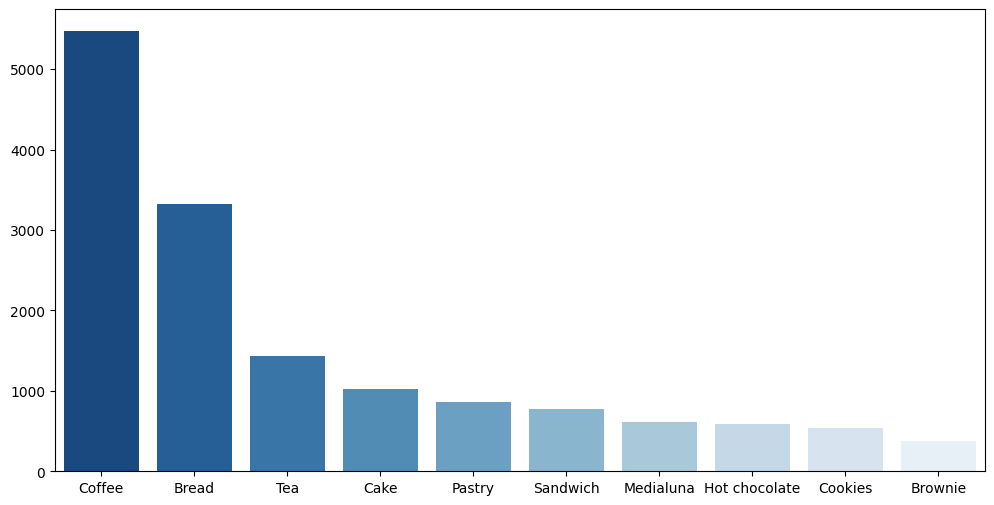

In [46]:
#Most popular items
plt.figure(figsize=(12,6))
sns.barplot(x=list(val_counts.keys()),y=list(val_counts.values()),palette="Blues_r")

In [49]:
daypart = dict(df.groupby('Daypart')['Items'].count().sort_values(ascending=False))

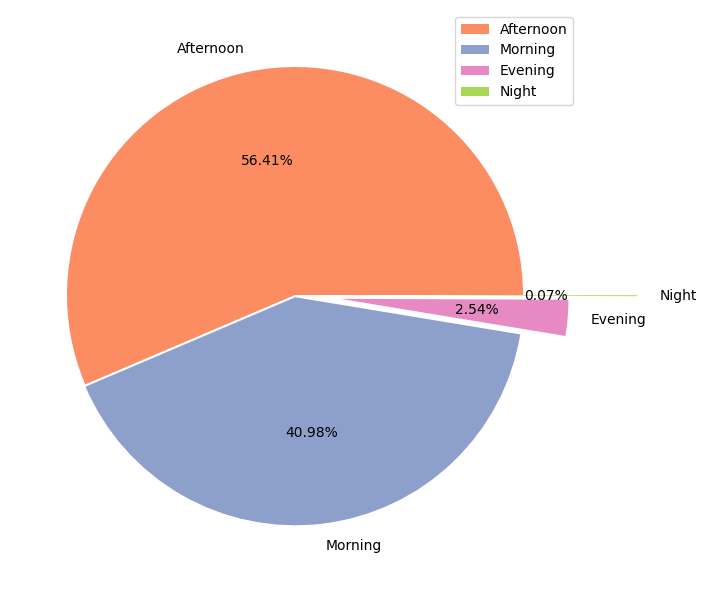

In [50]:
plt.figure(figsize=(10,6))
plt.pie(daypart.values(), labels=daypart.keys(), explode=[0, 0.01, 0.2, 0.5], colors = sns.color_palette("Set2")[1:], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

Most purchases were being made at Mornings and Afternoons

In [51]:
daytype = dict(df.groupby("DayType")["Items"].count().sort_values(ascending=False))

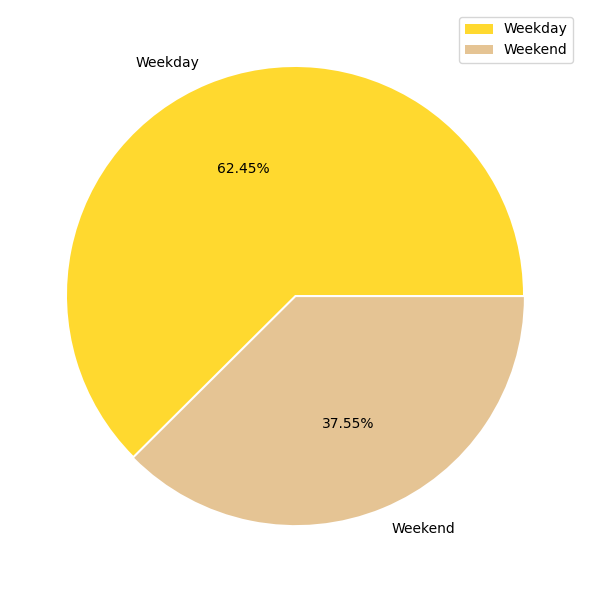

In [52]:
plt.figure(figsize=(10,6))
plt.pie(daytype.values(), labels=daytype.keys(), explode = [0, 0.01], colors = sns.color_palette("Set2")[5:7], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

Weekdays are busier than Weekends